<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>


We intend to predict the gender of users based on the data provided from Twitter and Instagram.

In [1]:
from emoji import emoji_count
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns 


|Column|Description|
|:------:|:---:|
|gender|Gender (target column)|
|age|User's age range|
|fullname|Name displayed on the social media profile|
|username|Username|
|biography|User's social media biography|
|follower_count|Number of followers|
|following_count|Number of accounts the user follows|
|is_business|Whether the account is business-related|
|is_verified|Whether the account is verified|
|is_private|Whether the account is private|

In [2]:
train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')
train

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
0,man,2,Farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nGlory man...,1604.0,1407.0,0.0,0.0,0.0
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",67.0,501.0,0.0,0.0,0.0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"Having you, is all I wish for \nداشتنت، تمامِ...",0.0,0.0,0.0,0.0,0.0
3,woman,1,Lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.0,0.0,0.0,0.0,0.0
4,woman,2,Narsis Asadollahi,_l.aurora.l_,I am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,200.0,328.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,woman,2,Ŋεgɨŋ,negiiin_bahrmandi,﷽\nAllah IS Enough FoR Me?\n♥️?,0.0,0.0,0.0,0.0,0.0
7996,man,3,h🗯abdi🗯offìcial,h.abdi.official,حقوقی,0.0,0.0,1.0,0.0,0.0
7997,woman,2,⚜رویا احمدی⚜,roya.ahmadi.k,مهندس صنایع👩‍🔧🏭 Industrial engineer\nمعمار👩‍💻👷...,1260.0,1167.0,0.0,0.0,0.0
7998,man,3,لرستان &خرم اباد,erfanpouersif,khoramabad,0.0,0.0,0.0,0.0,0.0


d:\projects\quera\self course\applied ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

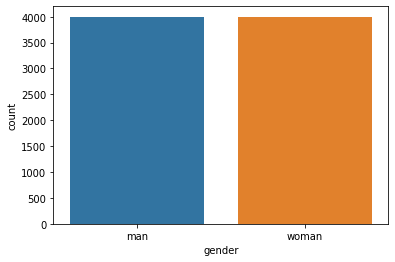

In [3]:
sns.countplot(train.gender)

In [4]:
train.isna().sum()

gender             0
age                0
fullname           0
username           0
biography          0
follower_count     0
following_count    0
is_business        3
is_verified        0
is_private         0
dtype: int64

In [5]:
train.fullname.fillna(train.username, inplace=True)

In [6]:
train['fullname'] = train['fullname'].apply(str.lower)
train['biography'] = train['biography'].apply(str.lower)

In [7]:
train['emoji_count'] = train.biography.apply(emoji_count)
train

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private,emoji_count
0,man,2,farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nglory man...,1604.0,1407.0,0.0,0.0,0.0,3
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",67.0,501.0,0.0,0.0,0.0,0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"having you, is all i wish for \nداشتنت، تمامِ...",0.0,0.0,0.0,0.0,0.0,8
3,woman,1,lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.0,0.0,0.0,0.0,0.0,0
4,woman,2,narsis asadollahi,_l.aurora.l_,i am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,200.0,328.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
7995,woman,2,ŋεgɨŋ,negiiin_bahrmandi,﷽\nallah is enough for me?\n♥️?,0.0,0.0,0.0,0.0,0.0,1
7996,man,3,h🗯abdi🗯offìcial,h.abdi.official,حقوقی,0.0,0.0,1.0,0.0,0.0,0
7997,woman,2,⚜رویا احمدی⚜,roya.ahmadi.k,مهندس صنایع👩‍🔧🏭 industrial engineer\nمعمار👩‍💻👷...,1260.0,1167.0,0.0,0.0,0.0,15
7998,man,3,لرستان &خرم اباد,erfanpouersif,khoramabad,0.0,0.0,0.0,0.0,0.0,0


<AxesSubplot:xlabel='emoji_count', ylabel='Density'>

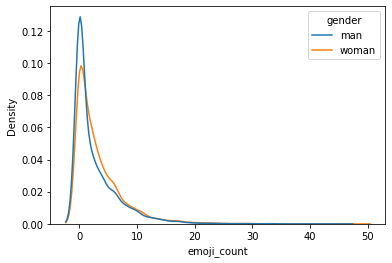

In [8]:
sns.kdeplot(train.emoji_count, hue=train.gender)

In [9]:
train['bio_lenght']= train.biography.apply(lambda s : len(s.split()))

<AxesSubplot:xlabel='bio_lenght', ylabel='Density'>

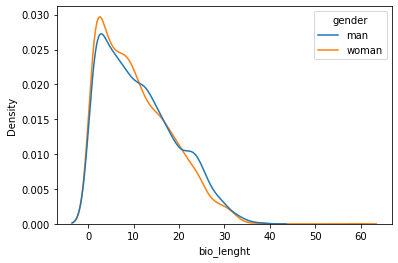

In [10]:
sns.kdeplot(train.bio_lenght, hue=train.gender)

In [11]:
train.username = train.username.str.replace('(\d+)','')
train.fullname = train.fullname.str.replace('(\d+)','')

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/838230299.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train.username = train.username.str.replace('(\d+)','')
C:\Users\NP\AppData\Local\Temp/ipykernel_5980/838230299.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train.fullname = train.fullname.str.replace('(\d+)','')


In [12]:
train['follower_count'] = train.follower_count.apply(lambda x : np.log(x+1))

In [13]:
tfidf = TfidfVectorizer()
tfidf.fit(train.fullname + ' ' + train.username + ' ' + train.biography)

TfidfVectorizer()

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

x_train,x_test , y_train,y_test = train_test_split(train.drop('gender', axis=1), train.gender, stratify=train.gender, random_state=313, test_size=.2)

txt_model = XGBClassifier()
txt_model.fit(tfidf.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)

d:\projects\quera\self course\applied ml\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, \
                            txt_model.predict(tfidf.transform(x_test.fullname + ' ' + x_test.username + ' ' + x_test.biography))))

              precision    recall  f1-score   support

         man       0.88      0.63      0.74       800
       woman       0.71      0.91      0.80       800

    accuracy                           0.77      1600
   macro avg       0.80      0.77      0.77      1600
weighted avg       0.80      0.77      0.77      1600



In [16]:
gender_by_txt_features =  txt_model.predict(tfidf.transform(train.fullname + ' ' + train.username + ' ' + train.biography))

In [17]:
data = train[['age', 'follower_count', 'is_business', 'is_verified', 'is_private', 'emoji_count', 'bio_lenght', 'gender']]
data['gender_by_txt'] = gender_by_txt_features
data

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/26972904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender_by_txt'] = gender_by_txt_features


,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender,gender_by_txt
0,2,7.380879,0.0,0.0,0.0,3,14,man,man
1,2,4.219508,0.0,0.0,0.0,0,14,woman,woman
2,2,0.000000,0.0,0.0,0.0,8,17,woman,woman
3,1,0.000000,0.0,0.0,0.0,0,4,woman,woman
4,2,5.303305,0.0,0.0,0.0,5,7,woman,woman
...,...,...,...,...,...,...,...,...,...
7995,2,0.000000,0.0,0.0,0.0,1,7,woman,woman
7996,3,0.000000,1.0,0.0,0.0,0,1,man,man
7997,2,7.139660,0.0,0.0,0.0,15,20,woman,woman
7998,3,0.000000,0.0,0.0,0.0,0,1,man,woman


In [18]:
data['gender_by_txt'] = data['gender_by_txt'].replace({'woman':0, 'man':1})
data

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/2402948122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender_by_txt'] = data['gender_by_txt'].replace({'woman':0, 'man':1})


,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender,gender_by_txt
0,2,7.380879,0.0,0.0,0.0,3,14,man,1
1,2,4.219508,0.0,0.0,0.0,0,14,woman,0
2,2,0.000000,0.0,0.0,0.0,8,17,woman,0
3,1,0.000000,0.0,0.0,0.0,0,4,woman,0
4,2,5.303305,0.0,0.0,0.0,5,7,woman,0
...,...,...,...,...,...,...,...,...,...
7995,2,0.000000,0.0,0.0,0.0,1,7,woman,0
7996,3,0.000000,1.0,0.0,0.0,0,1,man,1
7997,2,7.139660,0.0,0.0,0.0,15,20,woman,0
7998,3,0.000000,0.0,0.0,0.0,0,1,man,0


In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

x_train,x_test , y_train,y_test = train_test_split(data.drop('gender', axis=1), data.gender, stratify=data.gender, random_state=313, test_size=.2)

final_model = XGBClassifier()
final_model.fit(x_train, y_train)

d:\projects\quera\self course\applied ml\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, final_model.predict(x_test)))

              precision    recall  f1-score   support

         man       0.83      0.73      0.78       800
       woman       0.76      0.85      0.80       800

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



In [21]:
test['fullname'] = test['fullname'].apply(str.lower)
test['biography'] = test['biography'].apply(str.lower)

test.username = test.username.str.replace('(\d+)','')
test.fullname = test.fullname.str.replace('(\d+)','')

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/3611800819.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test.username = test.username.str.replace('(\d+)','')
C:\Users\NP\AppData\Local\Temp/ipykernel_5980/3611800819.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test.fullname = test.fullname.str.replace('(\d+)','')


In [22]:
test_data = test[['age', 'follower_count', 'is_business', 'is_verified', 'is_private']]
test_data['emoji_count'] = test.biography.apply(emoji_count)
test_data['bio_lenght'] = test.biography.apply(lambda s : len(s.split()))
test_data['gender_by_txt'] = txt_model.predict(tfidf.transform(test.fullname + ' ' + test.username + ' ' + test.biography))
test_data

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/371534292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['emoji_count'] = test.biography.apply(emoji_count)
C:\Users\NP\AppData\Local\Temp/ipykernel_5980/371534292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['bio_lenght'] = test.biography.apply(lambda s : len(s.split()))
C:\Users\NP\AppData\Local\Temp/ipykernel_5980/371534292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender_by_txt
0,2,791.0,0.0,0.0,0.0,9,16,man
1,4,0.0,0.0,0.0,0.0,0,10,man
2,2,1902.0,1.0,0.0,0.0,7,12,woman
3,1,114.0,0.0,0.0,0.0,1,1,woman
4,2,0.0,0.0,0.0,0.0,3,6,woman
...,...,...,...,...,...,...,...,...
1995,2,3793.0,0.0,0.0,0.0,0,7,woman
1996,2,0.0,0.0,0.0,0.0,6,21,woman
1997,3,0.0,0.0,0.0,0.0,3,26,man
1998,2,0.0,0.0,0.0,0.0,2,27,man


In [23]:
test_data['gender_by_txt'] = test_data['gender_by_txt'].replace({'woman':0, 'man':1})
test_data['follower_count'] = test_data['follower_count'].apply(lambda x : np.log(x+1))
test_data

C:\Users\NP\AppData\Local\Temp/ipykernel_5980/1825598067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['gender_by_txt'] = test_data['gender_by_txt'].replace({'woman':0, 'man':1})
C:\Users\NP\AppData\Local\Temp/ipykernel_5980/1825598067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['follower_count'] = test_data['follower_count'].apply(lambda x : np.log(x+1))


,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender_by_txt
0,2,6.674561,0.0,0.0,0.0,9,16,1
1,4,0.000000,0.0,0.0,0.0,0,10,1
2,2,7.551187,1.0,0.0,0.0,7,12,0
3,1,4.744932,0.0,0.0,0.0,1,1,0
4,2,0.000000,0.0,0.0,0.0,3,6,0
...,...,...,...,...,...,...,...,...
1995,2,8.241176,0.0,0.0,0.0,0,7,0
1996,2,0.000000,0.0,0.0,0.0,6,21,0
1997,3,0.000000,0.0,0.0,0.0,3,26,1
1998,2,0.000000,0.0,0.0,0.0,2,27,1


In [24]:
final_model.predict(test_data)

array(['man', 'man', 'woman', ..., 'man', 'man', 'woman'], dtype=object)

In [25]:
# predict test samples
submission = pd.DataFrame()
submission['gender'] = final_model.predict(test_data)
submission

,gender
0,man
1,man
2,woman
3,man
4,woman
...,...
1995,woman
1996,woman
1997,man
1998,man
